In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from transformers import BertTokenizer, BertModel





In [2]:
model_name = "bert-base-uncased"

tokenizer = BertTokenizer.from_pretrained(model_name)

model = BertModel.from_pretrained(
    model_name,
    output_attentions=True
)

model.eval()


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [3]:
sentence = "The mechanic inspected the engine because it was noisy."


In [4]:
inputs = tokenizer(sentence, return_tensors="pt")


In [5]:
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
tokens

['[CLS]',
 'the',
 'mechanic',
 'inspected',
 'the',
 'engine',
 'because',
 'it',
 'was',
 'noisy',
 '.',
 '[SEP]']

In [6]:
with torch.no_grad():
    outputs = model(**inputs)

attentions = outputs.attentions


In [7]:
layer = 0
head = 0

attention_matrix = attentions[layer][0, head].cpu().numpy()

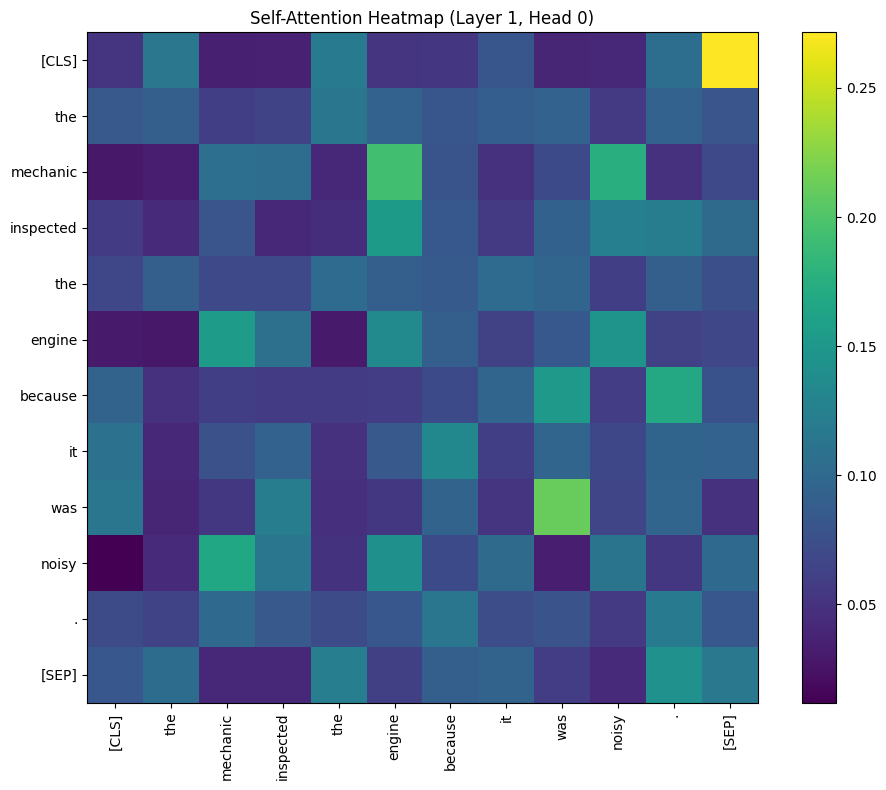

In [8]:
plt.figure(figsize=(10, 8))
plt.imshow(attention_matrix, cmap="viridis")

plt.xticks(range(len(tokens)), tokens, rotation=90)
plt.yticks(range(len(tokens)), tokens)

plt.colorbar()
plt.title("Self-Attention Heatmap (Layer 1, Head 0)")
plt.tight_layout()

plt.savefig("outputs/attention_heatmap.png")
plt.show()